Imagine that there is a search engine that provides the ability to search images based on their content. To do so, we need to build a machine learning model that is able to identify the objects in images. The models prototyped below will help in providing the capability to search for 10 distinct objects.

This project will use the CIFAR-10 dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


Using the CIFAR-10 dataset, I create a new notebook to build a TensorFlow model and perform each of the following tasks:

- Read CIFAR-10 dataset from Keras.
- Explore the data set
- Preprocess and prepare data for classification
- Build a TensorFlow model using a single dense hidden layer
- Apply model to test set and evaluate accuracy
- Perform 3 adjusts to the number of layers and activation functions to improve accuracy
- Summarize my findings regarding the different iterations and any insights gained

In [1]:
#!pip install keras

In [2]:
# import packages

import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU

In [4]:
# load test and training data for cifar10 dataset

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# check shape of input data

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [6]:
# Preprocess data for classification model

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

x_train2 = (x_train/255) 
x_test2 = (x_test/255) 

y_train2 = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test,NUM_CLASSES)

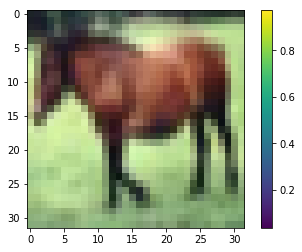

In [7]:
# Explore images from the data set
plt.figure()
plt.imshow(x_train2[7])
plt.colorbar()
plt.grid(False)
plt.show()

### Build initial CNN model using a single dense layer

In [8]:
# define model parameters

def make_model():
    
    model = Sequential()
    model.add(Dense(1024, input_shape = (32, 32, 3)))
    model.add(Flatten())
    model.add(Dense(NUM_CLASSES))
    model.add(LeakyReLU(0.1))
    model.add(Activation('softmax'))
    
    return model

In [9]:
model1 = make_model()

# prepare model for fitting (loss, optimizer, etc)
model1.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer='adam',  # 
    metrics=['accuracy']  # report accuracy during training
)

model1.fit(x_train2, y_train2, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 334s 214ms/step - loss: 2.0520 - accuracy: 0.3406
Epoch 2/2
1563/1563 [==============================] - 326s 209ms/step - loss: 1.7845 - accuracy: 0.3850


In [10]:
test_loss, test_acc = model1.evaluate(x_test2, y_test2)

print('Test accuracy:', test_acc)

313/313 [==============================] - 19s 60ms/step - loss: 1.7310 - accuracy: 0.4069
Test accuracy: 0.40689998865127563


C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


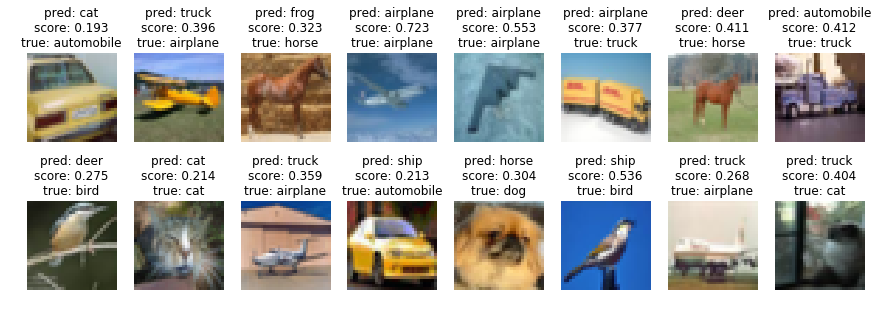

In [11]:
# Plot a random subset of the predictions from our initial model

y_pred_test = model1.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

### Improve TF CNN model making multiple adjustments:
- add 2D convolutional layers for immediate edge detection, feature extraction
- add 2x2 Max Pooling layer after convolutional layer
- repeat convolutional layers and pooling layer scheme again
- add a 256 node dense layer
- add a 10 node (= num classes) dense layer before output layer

In [15]:
# define model parameters

def make_model():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding =
      'same', activation = 'relu',
      input_shape = (32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding =
      'same', activation = 'relu',
      input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,
          2), strides = None,
      padding = 'valid',
      data_format = None))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding =
      'same', activation = 'relu',
      input_shape = (32, 32, 3)))
    model.add(Conv2D(64, (3, 3), padding =
      'same', activation = 'relu',
      input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,
          2), strides = None,
      padding = 'valid',
      data_format = None))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, input_shape = (256, )))
    model.add(Dense(NUM_CLASSES))
    model.add(LeakyReLU(0.1))
    model.add(Activation('softmax'))
    
    return model

In [23]:
model2 = make_model()

# prepare model for fitting (loss, optimizer, etc)
model2.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer='adam',  # 
    metrics=['accuracy']  # report accuracy during training
)

model2.fit(x_train2, y_train2, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 99s 64ms/step - loss: 1.3803 - accuracy: 0.5025
Epoch 2/3
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9983 - accuracy: 0.6503
Epoch 3/3
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8800 - accuracy: 0.6892


In [24]:
test_loss, test_acc = model2.evaluate(x_test2, y_test2)

print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.8018 - accuracy: 0.7199
Test accuracy: 0.7199000120162964


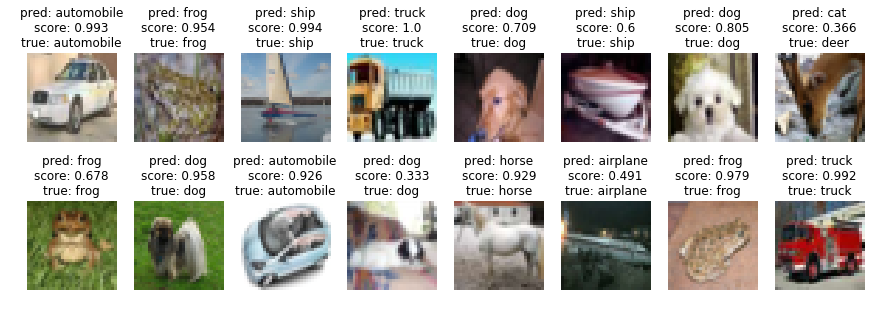

In [18]:
# Plot a random subset of the predictions from our initial model

y_pred_test = model2.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

### Discussion of CNN model results
The initial model with 2 dense layers only performed with <40% accuracy on the testing set. The second model included multiple types of specialized hidden layers including early 2D convolution layers to isolate edges and general features of the images, 2x2 MAX pooling layers to drop uninformative and redundant nodes and then dense layers to progressively constrain the dimensionality of the model before the output layer. It performed with an accuracy ~72% on the testing set, which is much better than the 40% accuracy of the initial model and the 10% chance accuracy.   

The improvement in the CNN model can be attributed to the sequence of the specialized layers. Convolutional layers blend groups of pixels together to capture the primary features and edges of the image. The pooling layers preserve only the most prominent information left after 2D convolution. Together, these specialized layers improved the CNN classification performance and increased the computational efficiency. 